In [1]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions.utils import load_json, load_logs_from_json
from classes.GeneticA import GeneticCharacteristics, GeneticAlgorithm
from classes.GridSearch import GridSearch



## Запускаем GridSearch ##

In [ ]:
initial_conditions = load_json("test_conditions/initial_conditions_10_20.json")
    # Пример использования GridSearch
grid_search = GridSearch(
    task_conditions=initial_conditions,  # Используем первый набор условий
    param_grid={
        'max_iterations': [15000],
        'epsilon': [0],
        'population_size': [50],
        'max_attempts': [1000],
        'size_to_generate': [100, 200],
        'desired_population_size': [50, 100],
        'change_to_mutation': [0.1],
        'tournament_size': [5, 10]
    }
)
best_params = grid_search.find_best_parameters(filename="./results/best_params.json")
grid_search.save_logs_to_file(filename="./results/logs.json")

Evaluating combination: {'max_iterations': 15000, 'epsilon': 0, 'population_size': 50, 'max_attempts': 1000, 'size_to_generate': 100, 'desired_population_size': 50, 'change_to_mutation': 0.1, 'tournament_size': 5}
test case: 1
Result fitness DP: 87418, Result fitness GA: 87418
test case: 2


In [ ]:
load_logs_from_json("./results/logs.json").sort_values(by='final_optimization_score')

Успешно загружено 8 записей из ./results/logs.json


,max_iterations,epsilon,population_size,max_attempts,size_to_generate,desired_population_size,change_to_mutation,tournament_size,final_optimization_score,test case 1,...,test case 3,test case 4,test case 5,test case 6,test case 7,test case 8,test case 9,test case 10,ga_time,dp_time
5,10000,0,50,1000,200,50,0.1,10,1.617099e+06,280830,...,551286,715460,590577,315507,19750,68342,420939,98359,183.891944,0.646273
1,10000,0,50,1000,100,50,0.1,10,1.619736e+06,281076,...,554011,716938,594240,314348,18020,66261,426448,99413,184.850857,0.636206
4,10000,0,50,1000,200,50,0.1,5,1.627786e+06,278718,...,555112,723366,593658,314989,19680,65783,433129,100413,120.280089,0.659108
0,10000,0,50,1000,100,50,0.1,5,1.630405e+06,279925,...,560118,723439,593213,316835,19680,67700,428021,99833,292.939248,0.658160
6,10000,0,50,1000,200,100,0.1,5,1.902889e+06,344191,...,688470,857784,669135,387003,50518,122243,562065,175305,178.272806,0.636203
7,10000,0,50,1000,200,100,0.1,10,1.902909e+06,344563,...,688969,857993,668753,386947,50564,122110,561729,175100,313.827556,0.663457
2,10000,0,50,1000,100,100,0.1,5,1.902985e+06,344584,...,688623,857757,668958,386451,50288,122338,562095,175172,1086.074364,0.643435
3,10000,0,50,1000,100,100,0.1,10,1.903238e+06,344440,...,688128,857965,669318,386438,50488,122389,562062,175354,302.123308,0.637560


## По лучшей конфигурации считаем значения ##


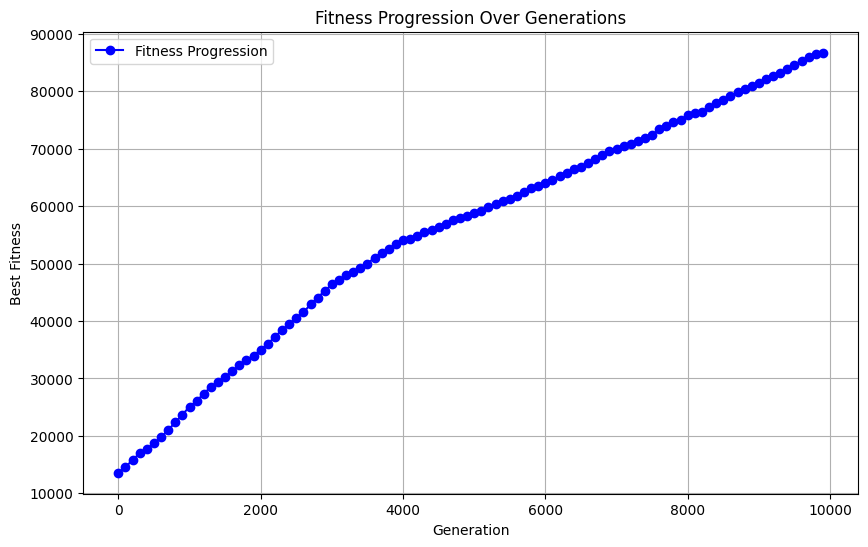

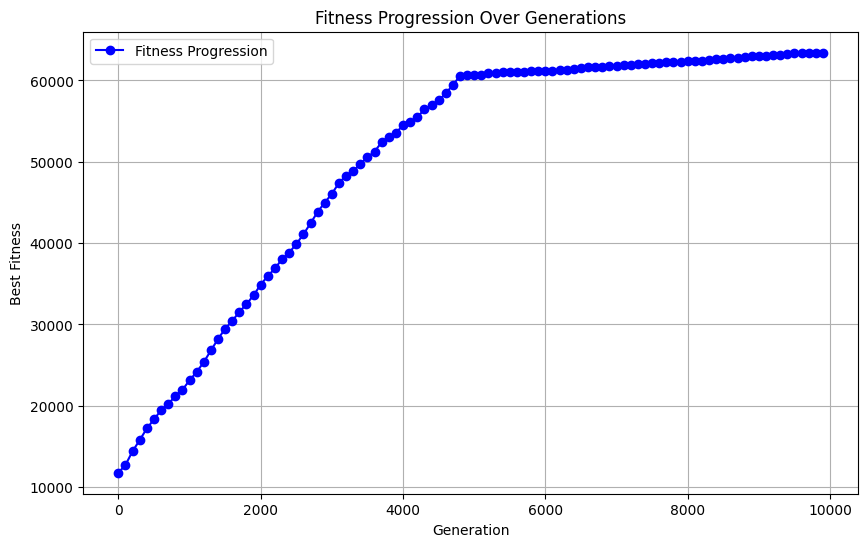

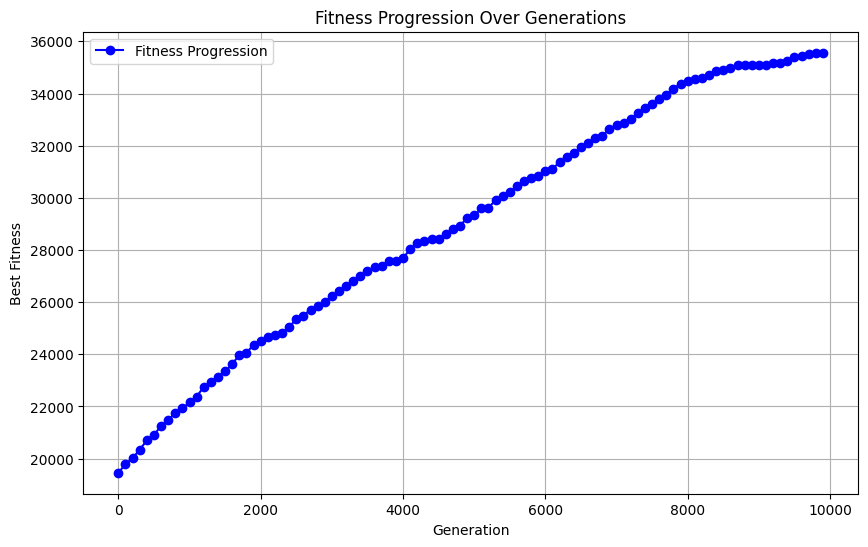

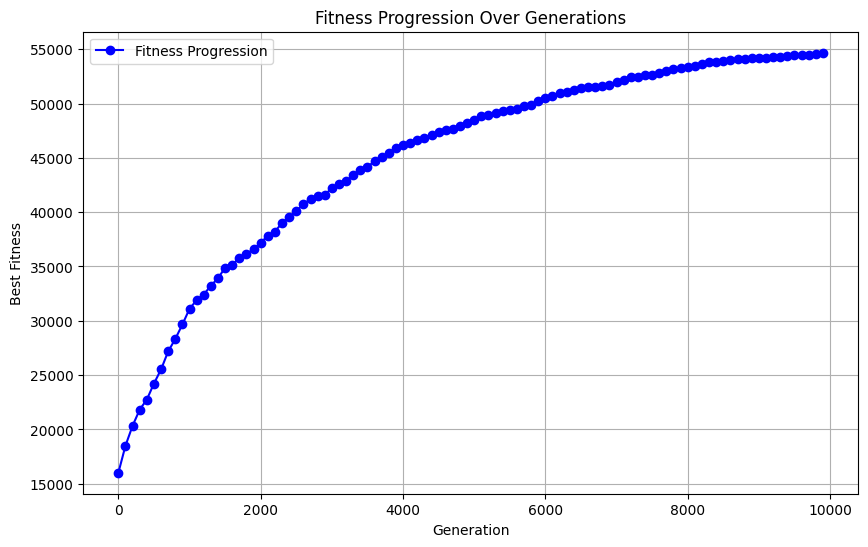

KeyboardInterrupt: 

In [ ]:
initial_conditions = load_json("test_conditions/initial_conditions_10_20.json")
best_params = load_json("results/best_params.json")

for condition in initial_conditions:

    genetic_characteristics = GeneticCharacteristics(
        population_size=best_params['population_size'],
        min_vals=condition['min_vals'],
        weights=condition['weights'],
        costs=condition['costs'],
        max_weight=condition['max_weight'],
        max_iterations=best_params['max_iterations'],
        epsilon=best_params['epsilon'],
        max_attempts=best_params['max_attempts'],
        size_to_generate=best_params['size_to_generate'],
        change_to_mutation=best_params['change_to_mutation'],
        tournament_size=best_params['tournament_size'],
        desired_population_size=best_params['desired_population_size']
    )
    
    genetic_algorithm = GeneticAlgorithm(genetic_characteristics)
    
    result_fitness_ga, result_ga = genetic_algorithm.start_algorithm(show_progression_type='plot')
    
    